# Customer lifetime value prediction

Customer lifetime value (CLV):
- indicates the total revenue from the customer during the entire relationship
- helps companies to focus on those potential customers who can bring in the more revenue in the future
- demonstrates the implications of acquiring long-term customers compare to short-term customers

## Data preparation

Using the data from EDA and Segmentation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
import statsmodels.api as st
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.svm import SVC, SVR
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
df_all = pd.read_csv("combined_data.csv")
df_all

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_order_date,usertype,no_of_items,price,freight_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Mon,...,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,São Paulo,2017-09-04 11:26:38,Return,1.0,29.99,8.72
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Tue,...,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,Bahia,2018-07-24 20:41:37,New,1.0,118.70,22.76
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wed,...,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,Goiás,2018-08-08 08:38:49,New,1.0,159.90,19.22
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Sat,...,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,Rio Grande do Norte,2017-11-18 19:28:06,New,1.0,45.00,27.20
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tue,...,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,São Paulo,2018-02-13 21:18:39,New,1.0,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,Thu,...,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,São Paulo,2017-03-09 09:54:05,New,1.0,72.00,13.08
99087,99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,Tue,...,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,São Paulo,2018-02-06 12:58:58,New,1.0,174.90,20.10
99088,99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,Sun,...,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,Bahia,2017-08-27 14:46:43,New,1.0,205.99,65.02
99089,99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,Mon,...,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,Rio de Janeiro,2018-01-08 21:28:27,New,2.0,359.98,81.18


In [4]:
df_all["order_purchase_timestamp"] = pd.to_datetime(df_all["order_purchase_timestamp"])
df_all["order_approved_at"] = pd.to_datetime(df_all["order_approved_at"])
df_all["order_delivered_carrier_date"] = pd.to_datetime(df_all["order_delivered_carrier_date"])
df_all["order_delivered_customer_date"] = pd.to_datetime(df_all["order_delivered_customer_date"])
df_all["order_estimated_delivery_date"] = pd.to_datetime(df_all["order_estimated_delivery_date"])

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99091 entries, 0 to 99090
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     99091 non-null  int64         
 1   order_id                       99091 non-null  object        
 2   customer_id                    99091 non-null  object        
 3   order_status                   99091 non-null  object        
 4   order_purchase_timestamp       99091 non-null  datetime64[ns]
 5   order_approved_at              98957 non-null  datetime64[ns]
 6   order_delivered_carrier_date   97376 non-null  datetime64[ns]
 7   order_delivered_customer_date  96204 non-null  datetime64[ns]
 8   order_estimated_delivery_date  99091 non-null  datetime64[ns]
 9   weekday                        99091 non-null  object        
 10  hour                           99091 non-null  int64         
 11  payment_value  

Calculate revenue from each customer:

In [6]:
df_all['yr_mon'] = df_all['order_purchase_timestamp'].dt.to_period('M').astype("string")
df_all.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_order_date,usertype,no_of_items,price,freight_value,yr_mon
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,São Paulo,2017-09-04 11:26:38,Return,1.0,29.99,8.72,2017-10
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,...,af07308b275d755c9edb36a90c618231,47813,barreiras,Bahia,2018-07-24 20:41:37,New,1.0,118.70,22.76,2018-07
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,Goiás,2018-08-08 08:38:49,New,1.0,159.90,19.22,2018-08
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,Rio Grande do Norte,2017-11-18 19:28:06,New,1.0,45.00,27.20,2017-11
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,São Paulo,2018-02-13 21:18:39,New,1.0,19.90,8.72,2018-02


In [7]:
SALES = df_all.pivot_table(index=["customer_unique_id"], columns=["yr_mon"],
                           values="payment_value", aggfunc="sum", fill_value=0).reset_index()
SALES.head()

yr_mon,customer_unique_id,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,141.90,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,27.19,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,86.22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,196.89,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [8]:
SALES["CLV"] = SALES.iloc[:,2:].sum(axis=1)
SALES.head()

yr_mon,customer_unique_id,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,CLV
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,141.90,0.0,0.0,0.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.19,0.0,0.0,0.0,27.19
2,0000f46a3911fa3c0805444483337064,0.0,0.0,86.22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,43.62
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,196.89


## Part 1: predict CLV

Using historical montly revenue data

In [9]:
X = SALES[['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', 
           '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08']]
y = SALES[['CLV']]
X

yr_mon,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,141.90,0.0,0.0,0.0
1,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,27.19,0.0,0.0,0.0
2,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,0.0,0.0,43.62,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,0.0,0.0,0.00,196.89,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95768,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
95769,0.0,0.0,0.00,0.00,84.58,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
95770,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
95771,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,133.69,0.0,0.0,0.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.477e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:51:38   Log-Likelihood:            -3.9650e+05
No. Observations:               64167   AIC:                         7.930e+05
Df Residuals:                   64153   BIC:                         7.932e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4292      0.547     73.933      0.0

In [12]:
print("Precision of linear regression on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Precision of linear regression on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Precision of linear regression on training set: 0.750
Precision of linear regression on test set: 0.672


### KNN Regressor

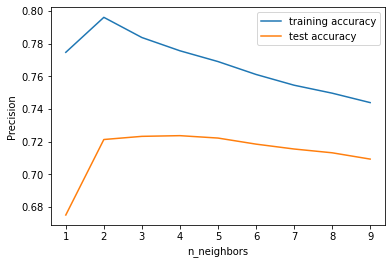

In [13]:
training_precision = []
test_precision = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # record training set precision
    training_precision.append(knn.score(X_train, y_train))
    # record test set precision
    test_precision.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_precision, label="training accuracy")
plt.plot(neighbors_settings, test_precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

In [14]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
print("Precision of K-NN regressor on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Precision of K-NN regressor on test set: {:.3f}".format(knn.score(X_test, y_test)))

Precision of K-NN regressor on training set: 0.796
Precision of K-NN regressor on test set: 0.721


### Decision Tree

In [15]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
print("Precision of Decision Tree regressor on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Precision of Decision Tree regressor on test set: {:.3f}".format(dt.score(X_test, y_test)))

Precision of Decision Tree regressor on training set: 0.815
Precision of Decision Tree regressor on test set: 0.719


### Random Forest

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Precision of Random Forest regressor on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Precision of Random Forest regressor on test set: {:.3f}".format(rf.score(X_test, y_test)))

Precision of Random Forest regressor on training set: 0.807
Precision of Random Forest regressor on test set: 0.723


### Evaluation

In [17]:
y_pred_regressor = regressor.predict(X_test)
regressor_r = regressor.score(X_test, y_test)
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)

In [18]:
y_pred_knn = knn.predict(X_test)
knn_r = knn.score(X_test, y_test)
knn_mse = mean_squared_error(y_pred_knn, y_test)
knn_rmse = np.sqrt(knn_mse)

In [19]:
y_pred_dt = dt.predict(X_test)
dt_r = dt.score(X_test, y_test)
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)

In [20]:
y_pred_rf = rf.predict(X_test)
rf_r = rf.score(X_test, y_test)
rf_mse = mean_squared_error(y_pred_rf, y_test)
rf_rmse = np.sqrt(rf_mse)

In [21]:
models = ["Linear Regression", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]
tests_rmse = [regressor_rmse, knn_rmse, dt_rmse, rf_rmse]
tests_r = [regressor_r, knn_r, dt_r, rf_r]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests RMSE": tests_rmse, "Tests R":tests_r })
compare_models.sort_values(by = "Tests RMSE", ascending = True)

,Algorithms,Tests RMSE,Tests R
3,Random Forest,118.769960,0.722936
1,K-Nearest Neighbors,119.114519,0.721326
2,Decision Tree,119.695503,0.718601
0,Linear Regression,129.320140,0.671527


### Overall random forest have higher precision and lowest RMSE
We can use random forest for further calculation

## Part 2: predict next purchase date

Using RFM scores and historical purchase behavior

In Segmentation.ipynb we already put customers into clusters using KNN:

In [22]:
df_segment = pd.read_csv("segment_data.csv")
df_segment

,customer_unique_id,Recency,Frequency,Monetary,Cluster,RFM_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,0,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,0,Promising
2,0000f46a3911fa3c0805444483337064,538,1,86.22,3,Champions
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,Champions
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,Champions
...,...,...,...,...,...,...
95768,fffcf5a5ff07b0908bd4e2dbc735a684,448,1,2067.42,2,Potential Loyalist
95769,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,3,Champions
95770,ffff371b4d645b6ecea244b27531430a,569,1,112.46,3,Champions
95771,ffff5962728ec6157033ef9805bacc48,120,1,133.69,0,Promising


In [59]:
df_m2 = df_segment.merge(SALES[["customer_unique_id", "CLV"]], how = "left", on = "customer_unique_id")
df_m2

,customer_unique_id,Recency,Frequency,Monetary,Cluster,RFM_Level,CLV
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,0,Promising,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,0,Promising,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22,3,Champions,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,Champions,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,Champions,196.89
...,...,...,...,...,...,...,...
95768,fffcf5a5ff07b0908bd4e2dbc735a684,448,1,2067.42,2,Potential Loyalist,2067.42
95769,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,3,Champions,84.58
95770,ffff371b4d645b6ecea244b27531430a,569,1,112.46,3,Champions,112.46
95771,ffff5962728ec6157033ef9805bacc48,120,1,133.69,0,Promising,133.69


In [60]:
df_m2.drop(["RFM_Level"], axis = "columns", inplace= True)

In [25]:
#plt.figure(figsize = (12,10))
#sns.heatmap(df_m2.corr(), annot = True, linewidths=0.2, fmt=".2f")

Find the days that each customer made purchase. If a customer made multiple purchase on the same day, keep the first one and drop the others.

In [54]:
day_order = df_all[['customer_unique_id','order_purchase_timestamp']]
day_order = day_order.sort_values(['customer_unique_id','order_purchase_timestamp'])
day_order = day_order.drop_duplicates(subset=['customer_unique_id','order_purchase_timestamp'],keep='first')
day_order['order_purchase_timestamp'] = day_order['order_purchase_timestamp'].dt.date
day_order

,customer_unique_id,order_purchase_timestamp
52618,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
73628,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
26370,0000f46a3911fa3c0805444483337064,2017-03-10
98148,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
41416,0004aac84e0df4da2b147fca70cf8255,2017-11-14
...,...,...
86701,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08
20486,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10
43791,ffff371b4d645b6ecea244b27531430a,2017-02-07
96516,ffff5962728ec6157033ef9805bacc48,2018-05-02


Create new columns with the dates of last 2 purchases.

In [55]:
day_order['date1']= day_order.groupby('customer_unique_id')['order_purchase_timestamp'].shift(1)
day_order['date2'] = day_order.groupby('customer_unique_id')['order_purchase_timestamp'].shift(2)
day_order

,customer_unique_id,order_purchase_timestamp,date1,date2
52618,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,NaN,NaN
73628,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,NaN,NaN
26370,0000f46a3911fa3c0805444483337064,2017-03-10,NaN,NaN
98148,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,NaN,NaN
41416,0004aac84e0df4da2b147fca70cf8255,2017-11-14,NaN,NaN
...,...,...,...,...
86701,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,NaN,NaN
20486,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,NaN,NaN
43791,ffff371b4d645b6ecea244b27531430a,2017-02-07,NaN,NaN
96516,ffff5962728ec6157033ef9805bacc48,2018-05-02,NaN,NaN


In [56]:
day_order['DayDiff1'] = (day_order['order_purchase_timestamp'] - day_order['date1']).dt.days
day_order['DayDiff2'] = (day_order['order_purchase_timestamp'] - day_order['date2']).dt.days
day_order

,customer_unique_id,order_purchase_timestamp,date1,date2,DayDiff1,DayDiff2
52618,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,NaN,NaN,NaN,NaN
73628,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,NaN,NaN,NaN,NaN
26370,0000f46a3911fa3c0805444483337064,2017-03-10,NaN,NaN,NaN,NaN
98148,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,NaN,NaN,NaN,NaN
41416,0004aac84e0df4da2b147fca70cf8255,2017-11-14,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
86701,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,NaN,NaN,NaN,NaN
20486,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,NaN,NaN,NaN,NaN
43791,ffff371b4d645b6ecea244b27531430a,2017-02-07,NaN,NaN,NaN,NaN
96516,ffff5962728ec6157033ef9805bacc48,2018-05-02,NaN,NaN,NaN,NaN


In [57]:
day_diff = day_order.groupby(['customer_unique_id']).agg({'DayDiff1':['mean','std']}).reset_index()
day_diff.columns = ['customer_unique_id', 'DayDiffMean','DayDiffStd']
day_diff

,customer_unique_id,DayDiffMean,DayDiffStd
0,0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN
2,0000f46a3911fa3c0805444483337064,NaN,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN
4,0004aac84e0df4da2b147fca70cf8255,NaN,NaN
...,...,...,...
95768,fffcf5a5ff07b0908bd4e2dbc735a684,NaN,NaN
95769,fffea47cd6d3cc0a88bd621562a9d061,NaN,NaN
95770,ffff371b4d645b6ecea244b27531430a,NaN,NaN
95771,ffff5962728ec6157033ef9805bacc48,NaN,NaN


In [58]:
next_date = day_order.groupby('customer_unique_id').agg({'order_purchase_timestamp':["min", "max"]}).reset_index()
next_date.columns = ['customer_unique_id', 'date_min','date_max']
next_date['NextPurchaseDay'] = (next_date['date_max'] - next_date['date_min']).dt.days
next_date

,customer_unique_id,date_min,date_max,NextPurchaseDay
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07,0
2,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14,0
...,...,...,...,...
95768,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,2017-06-08,0
95769,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,2017-12-10,0
95770,ffff371b4d645b6ecea244b27531430a,2017-02-07,2017-02-07,0
95771,ffff5962728ec6157033ef9805bacc48,2018-05-02,2018-05-02,0


In [61]:
day_order_last = day_order.drop_duplicates(subset=['customer_unique_id'], keep='last')
day_order_last = day_order_last.dropna()
day_order_last = pd.merge(day_order_last, day_diff, on='customer_unique_id')
df_m2 = df_m2.merge(day_order_last[['customer_unique_id','DayDiff1','DayDiff2',
                                    'DayDiffMean','DayDiffStd']], on='customer_unique_id')
df_m2

,customer_unique_id,Recency,Frequency,Monetary,Cluster,CLV,DayDiff1,DayDiff2,DayDiffMean,DayDiffStd
0,02e9109b7e0a985108b43e573b6afb23,109,3,602.73,1,602.73,1.0,172.0,86.0,120.208153
1,041caba6a63ace5818387698ea85cdb2,99,3,153.46,0,153.46,188.0,435.0,217.5,41.719300
2,043aee247e71edff7045664609f4d806,409,3,690.52,1,690.52,53.0,117.0,58.5,7.778175
3,07b1b60bca2b6326fa2adb259ea4a55f,113,3,251.54,0,251.54,40.0,44.0,22.0,25.455844
4,083ca1aa470c280236380973a48f77c6,17,4,320.26,1,320.26,362.0,373.0,127.0,203.521498
...,...,...,...,...,...,...,...,...,...,...
212,fd8ccc89be43894d2553494c71a61fd8,134,3,258.03,0,258.03,37.0,39.0,19.5,24.748737
213,fe59d5878cd80080edbd29b5a0a4e1cf,374,3,185.09,3,185.09,8.0,76.0,38.0,42.426407
214,fe81bb32c243a86b2f86fbf053fe6140,71,5,1590.76,4,1590.76,7.0,118.0,60.5,60.649265
215,ff36be26206fffe1eb37afd54c70e18b,8,3,278.28,0,278.28,3.0,26.0,13.0,14.142136


In [62]:
df_m2 = df_m2.merge(next_date[['customer_unique_id', "NextPurchaseDay"]], how = "left", on = "customer_unique_id")

In [63]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 216
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  217 non-null    object 
 1   Recency             217 non-null    int64  
 2   Frequency           217 non-null    int64  
 3   Monetary            217 non-null    float64
 4   Cluster             217 non-null    int64  
 5   CLV                 217 non-null    float64
 6   DayDiff1            217 non-null    float64
 7   DayDiff2            217 non-null    float64
 8   DayDiffMean         217 non-null    float64
 9   DayDiffStd          217 non-null    float64
 10  NextPurchaseDay     217 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 20.3+ KB


In [64]:
df_m2["NextPurchaseDay"].describe()

count    217.000000
mean     165.811060
std      137.539005
min        0.000000
25%       52.000000
50%      134.000000
75%      257.000000
max      537.000000
Name: NextPurchaseDay, dtype: float64

Based on distribution of time interval of 2 purchases, we decide that:
- Class 2: Customers that might repurchase in 0–52 days
- Class 1: Customers that might repurchase in 53–257 days
- Class 0: Customers that might repurchase in more than 257 days

In [65]:
df_m2['NextPurchaseDayRange'] = 2
df_m2.loc[df_m2["NextPurchaseDay"] > 52,'NextPurchaseDayRange'] = 1
df_m2.loc[df_m2["NextPurchaseDay"] > 257,'NextPurchaseDayRange'] = 0

In [66]:
df_m2.drop(['NextPurchaseDay'], axis=1, inplace = True)

In [67]:
X, y = df_m2.drop(['customer_unique_id', 'NextPurchaseDayRange'],axis=1), df_m2["NextPurchaseDayRange"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [68]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("Dtree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))

In [69]:
for name, model in models:
    kfold = KFold(n_splits = 3)
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    print(name, cv_result)

LR [0.81034483 0.70689655 0.80701754]
NB [0.84482759 0.79310345 0.98245614]
RF [0.89655172 0.84482759 0.94736842]
SVC [0.70689655 0.63793103 0.54385965]
Dtree [0.89655172 0.82758621 0.92982456]
KNN [0.72413793 0.79310345 0.77192982]


In [71]:
for name, model in models:
    model_temp = model
    model_temp.fit(X_train, y_train)
    y_pred = model_temp.predict(X_test)
    print("======"+name+"======\n")
    print(classification_report(y_test, y_pred))

======LR======

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.76      0.65      0.70        20
           2       0.90      0.90      0.90        10

    accuracy                           0.75        44
   macro avg       0.77      0.78      0.77        44
weighted avg       0.76      0.75      0.75        44

======NB======

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.94      0.80      0.86        20
           2       1.00      0.90      0.95        10

    accuracy                           0.89        44
   macro avg       0.91      0.90      0.90        44
weighted avg       0.90      0.89      0.89        44

======RF======

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.98        20
           2       1.00    

Overall, Gaussian Naive Bayes model achieved best performance. We can use it for predicting next purchase day range.

In [72]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()